# 1장 크롤링과 스크레이핑

## 1-1 데이터 다운로드하기

In [1]:
import urllib.request

url = 'http://uta.pw/shodou/img/28/214.png'
savename = 'test.png'

#파일에 곧바로 저장
urllib.request.urlretrieve(url, savename)
print('저장되었습니다!')

#파이썬 메모리 위에 올린 후 파일에 저장
mem = urllib.request.urlopen(url).read()
with open(savename, mode='wb') as f: #w: write, b: binary
    f.write(mem)
    print('저장되었습니다!')

저장되었습니다!
저장되었습니다!


In [2]:
import urllib.request

url = 'http://api.aoikujira.com/ip/ini'
res = urllib.request.urlopen(url)
data = res.read()

#바이너리를 문자로 변환
text = data.decode('utf-8')
print(text)

[ip]
API_URI=http://api.aoikujira.com/ip/get.php
REMOTE_ADDR=121.140.76.194
REMOTE_HOST=121.140.76.194
REMOTE_PORT=42158
HTTP_HOST=api.aoikujira.com
HTTP_USER_AGENT=Python-urllib/3.7
HTTP_ACCEPT_LANGUAGE=
HTTP_ACCEPT_CHARSET=
SERVER_PORT=80
FORMAT=ini




In [3]:
import urllib.request
import urllib.parse
API = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp'

#매개변수를 URL 인코딩 - 한글 포함되어 있으면 반드시 인코딩할 것
values = {
    'stnId':'109'
}
params = urllib.parse.urlencode(values)

#요청 전용 URL 생성
url = API + '?' + params
print('url=', url)

#다운로드
data = urllib.request.urlopen(url).read()
text = data.decode('utf-8')
print(text[:300])

url= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2020년 08월 08일 (토)요일 18:00</pu


## 1-2 BeautifulSoup로 스크레이핑하기

- BeautifulSoup 자체에는 다운로드 기능이 없음

In [4]:
from bs4 import BeautifulSoup

#분석하고 싶은 HTML
html = """
<html><body>
<h1>스크레이핑이란?</h1>
<p>웹 페이지를 분석하는 것</p>
<p>원하는 부분을 추출하는 것</p>
</body></html>
"""

#HTML 분석하기
soup = BeautifulSoup(html, 'html.parser')

h1 = soup.html.body.h1
p1 = soup.html.body.p
p1_2 = p1.next_sibling
p2 = p1.next_sibling.next_sibling

print("h1 = " + h1.string)
print("p  = " + p1.string)
print("p  = " + p1_2.string)
print("p  = " + p2.string)

h1 = 스크레이핑이란?
p  = 웹 페이지를 분석하는 것
p  = 

p  = 원하는 부분을 추출하는 것


In [5]:
from bs4 import BeautifulSoup

#분석하고 싶은 HTML
html = """
<html><body>
<h1 id="title">스크레이핑이란?</h1>
<p id="body">웹 페이지를 분석하는 것</p>
<p>원하는 부분을 추출하는 것</p>
</body></html>
"""

soup = BeautifulSoup(html, 'html.parser')

#id로 찾기
title = soup.find(id="title")
body = soup.find(id="body")

print("#title = "+title.string)
print("#body  = "+body.string)

#title = 스크레이핑이란?
#body  = 웹 페이지를 분석하는 것


In [6]:
from bs4 import BeautifulSoup

#분석하고 싶은 HTML
html = """
<html><body>
<ul>
<li><a href="http://www.naver.com">naver</a></li>
<li><a href="http://www.daum.net">daum</a></li>
</body></html>
"""

#HTML 분석하기
soup = BeautifulSoup(html, 'html.parser')

#find_all
links = soup.find_all("a")

for a in links:
    href = a.attrs['href']
    text = a.string
    print(text, ">", href)
    
print(soup.prettify())

naver > http://www.naver.com
daum > http://www.daum.net
<html>
 <body>
  <ul>
   <li>
    <a href="http://www.naver.com">
     naver
    </a>
   </li>
   <li>
    <a href="http://www.daum.net">
     daum
    </a>
   </li>
  </ul>
 </body>
</html>



In [7]:
#urlopen과 BeautifulSoup 조합하기
from bs4 import BeautifulSoup
import urllib.request as req

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

#urlopen()으로 데이터 가져오기
res = req.urlopen(url)

#BeautifulSoup으로 분석하기
soup = BeautifulSoup(res, "html.parser")

#원하는 데이터 추출하기
title = soup.find("title").string
wf = soup.find("wf").string
print(title)
print(wf)

기상청 육상 중기예보
○ (강수) 11일(화)은 전국(제주도 제외)에 비가 오겠고, 12일(수)~14일(금)은 서울.경기도와 강원영서에 비가 오겠습니다.<br />○ (기온) 이번 예보기간의 낮 기온은 27~35도로 오늘(23~29도)보다 높겠고, <br />          특히, 경북내륙과 강원동해안을 중심으로 낮 기온이 34도 내외로 매우 덥겠고, 열대야가 나타나는 곳이 있겠습니다.<br /><br />* 최근 전국에 많은 비가 온 가운데, 앞으로 중부지방에 장기간에 걸쳐 비가 예상됨에 따라 위험요소를 미리 점검하여 비로 인한 피해가 없도록 유의하기 바랍니다.<br />* 이번 예보기간은 정체전선의 위치와 기압골의 발달정도에 따라 강수시점과 지역이 변경될 가능성이 있으니, 앞으로 발표되는 기상정보를 참고하기 바랍니다.


In [8]:
#css 선택자 사용하기
from bs4 import BeautifulSoup

html = """
<html><body>
<div id="meigen">
<h1>위키북스 도서</h1>
<ul class="items">
<li>유니티 게임 이펙트 입문</li>
<li>스위프트로 시작하는 아이폰 앱 개발 교과서</li>
<li>모던 웹사이트 디자인의 정석</li>
</ul>
</div>
</body></html>
"""

soup = BeautifulSoup(html, "html.parser")

#필요한 부분을 css 쿼리로 추출하기
h1 = soup.select_one("div#meigen > h1").string
print("h1 = ", h1)

li_list = soup.select("div#meigen > ul.items > li")
for li in li_list:
    print("li = ", li.string)

h1 =  위키북스 도서
li =  유니티 게임 이펙트 입문
li =  스위프트로 시작하는 아이폰 앱 개발 교과서
li =  모던 웹사이트 디자인의 정석


In [9]:
#네이버 금융에서 환율 정보 추출하기
from bs4 import BeautifulSoup
import urllib.request as req

url = "https://finance.naver.com/marketindex/"
res = req.urlopen(url)

soup = BeautifulSoup(res, "html.parser")

price = soup.select_one("div.head_info > span.value").string
print("usd/krw =", price)

usd/krw = 1,188.50


## 1-3 CSS 선택자

* **\***              : 모든 요소 선택
* **<요소 이름>**    : 요소 이름 기반으로 선택
* **.<클래스 이름>** : 클래스 이름 기반으로 선택
* **#<id 이름>**      : id 속성을 기반으로 선택

In [10]:
from bs4 import BeautifulSoup
import urllib.request as req

url = "https://ko.wikisource.org/wiki/%EC%A0%80%EC%9E%90:%EC%9C%A4%EB%8F%99%EC%A3%BC"
res = req.urlopen(url)
soup = BeautifulSoup(res, "html.parser")

a_list = soup.select("#mw-content-text > div > ul > li a")

for a in a_list[:5]:
    name = a.string
    print("-", name)    

- 하늘과 바람과 별과 시
- 증보판
- 서시
- 자화상
- 소년


In [11]:
#CSS 선택자로 추출 연습하기

html="""
<ul id="bible">
    <li id="ge">Genesis</li>
    <li id="ex">Exodus</li>
    <li id="le">Leviticus</li>
    <li id="nu">Numbers</li>
    <li id="de">Deuteronomy</li>
</ul>
"""

#Numbers 추출하기
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

#CSS 선택자로 검색하는 방법
sel = lambda q: print(soup.select_one(q).string)
sel("#nu")
sel("li#nu")
sel("ul > li#nu")
sel("#bible #nu")
sel("#bible > #nu")
sel("ul#bible > li#nu")
sel("li[id='nu']")
sel("li:nth-of-type(4)")

#그 외의 방법
print(soup.select("li")[3].string)
print(soup.find_all("li")[3].string)

Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers


In [20]:
from bs4 import BeautifulSoup

fp = open("fruits-vegetables.html", encoding="utf-8")
soup = BeautifulSoup(fp, "html.parser")
print(soup.prettify())
print()

#CSS 선택자로 추출하기
# print(soup.select_one("li:nth-of-type(8)").string)
print(soup.select_one("#ve-list > li:nth-of-type(4)").string)
print(soup.select("#ve-list > li[data-lo='us']")[1].string)
print(soup.select("#ve-list > li.black")[1].string)

#find 메서드로 추출하기
cond = {"data-lo":"us", "class":"black"}
print(soup.find("li", cond).string)

#find 메서드를 연속으로 사용하기
print(soup.find(id="ve-list")
         .find("li", cond).string)

<html>
 <body>
  <div id="main-goods" role="page">
   <h1>
    과일과 야채
   </h1>
   <ul id="fr-list">
    <li class="red green" data-lo="ko">
     사과
    </li>
    <li class="purple" data-lo="us">
     포도
    </li>
    <li class="yellow" data-lo="us">
     레몬
    </li>
    <li class="yellow" data-lo="ko">
     오렌지
    </li>
   </ul>
   <ul id="ve-list">
    <li class="white green" data-lo="ko">
     무
    </li>
    <li class="red green" data-lo="us">
     파프리카
    </li>
    <li class="black" data-lo="ko">
     가지
    </li>
    <li class="black" data-lo="us">
     아보카도
    </li>
    <li class="white" data-lo="cn">
     연근
    </li>
   </ul>
  </div>
 </body>
</html>

아보카도
아보카도
아보카도
아보카도
아보카도


In [21]:
#정규표현식과 함께 조합하기
from bs4 import BeautifulSoup
import re

html = """
<ul>
  <li><a href="hoge.html">hoge</li>
  <li><a href="https://example.com/fuga">fuga*</li>
  <li><a href="https://example.com/foo">foo*</li>
  <li><a href="http://example.com/aaa">aaa</li>
</ul>
"""

soup = BeautifulSoup(html, "html.parser")

#정규 표현식으로 href에서 https인 것 추출하기
li = soup.find_all(href=re.compile(r"^https://"))
for e in li:
    print(e.attrs['href'])

https://example.com/fuga
https://example.com/foo


## 1-4 링크에 있는 것을 한꺼번에 내려받기

In [25]:
from urllib.parse import urljoin

#상대링크를 절대링크로 변환
base = "http://example.com/html/a.html"

print(urljoin(base, "b.html"))
print(urljoin(base, "sub/c.html"))
print(urljoin(base, "../index.html"))
print(urljoin(base, "../img/hoge.png"))
print(urljoin(base, "../css/hoge.css"))
print()
print(urljoin(base, "http://otherExample.com/wiki"))
print(urljoin(base, "//anotherExample.org/test"))

http://example.com/html/b.html
http://example.com/html/sub/c.html
http://example.com/index.html
http://example.com/img/hoge.png
http://example.com/css/hoge.css

http://otherExample.com/wiki
http://anotherExample.org/test


In [ ]:
# 파이썬 매뉴얼을 재귀적으로 다운받는 프로그램

from bs4 import BeautifulSoup
from urllib.request import *
from urllib.parse import *
from os import makedirs
import os.path, time, re

# 이미 처리한 파일인지 확인하기 위한 변수 
proc_files = {}

# HTML 내부에 있는 링크를 추출하는 함수 
def enum_links(html, base):
    soup = BeautifulSoup(html, "html.parser")
    links = soup.select("link[rel='stylesheet']") # CSS
    links += soup.select("a[href]") # 링크
    result = []

    # href 속성을 추출하고, 링크를 절대 경로로 변환
    for a in links:
        href = a.attrs['href']
        url = urljoin(base, href)
        result.append(url)
    return result

# 파일을 다운받고 저장하는 함수 
def download_file(url):
    o = urlparse(url)
    savepath = "./" + o.netloc + o.path
    
    if re.search(r"/$", savepath): # 폴더라면 index.html
        savepath += "index.html"
    savedir = os.path.dirname(savepath)
    
    # 모두 다운됐는지 확인
    if os.path.exists(savepath): 
        return savepath
    
    # 다운받을 폴더 생성
    if not os.path.exists(savedir):
        print("mkdir=", savedir)
        makedirs(savedir)
    
    # 파일 다운받기 
    try:
        print("download=", url)
        urlretrieve(url, savepath)
        time.sleep(1) # 1초 휴식 
        return savepath
    except:
        print("다운 실패: ", url)
        return None        
    
# HTML을 분석하고 다운받는 함수
def analyze_html(url, root_url):
    savepath = download_file(url)
    
    if savepath is None: 
        return
    
    if savepath in proc_files: 
        return # 이미 처리됐다면 실행하지 않음
    
    proc_files[savepath] = True
    print("analyze_html=", url)
    
    # 링크 추출 
    html = open(savepath, "r", encoding="utf-8").read()
    links = enum_links(html, url)
    for link_url in links:
        
        # 링크가 루트 이외의 경로를 나타낸다면 무시
        if link_url.find(root_url) != 0:
            if not re.search(r".css$", link_url): 
                continue
        # HTML이라면
        if re.search(r".(html|htm)$", link_url):
            # 재귀적으로 HTML 파일 분석하기
            analyze_html(link_url, root_url)
            continue
        # 기타 파일
        download_file(link_url)
        
if __name__ == "__main__":
    # URL에 있는 모든 것 다운받기
    url = "https://docs.python.org/3.5/library/"
    analyze_html(url, url)

# 2장 고급 스크레이핑

## 2-1 로그인이 필요한 사이트에서 다운받기

**쿠키와 세션**

* 쿠키: 웹 브라우저를 통해 사이트에 방문하는 사람의 컴퓨터에 일시적으로 데이터를 저장하는 기능

* 세션: 쿠키를 사용해 데이터를 저장하지만 쿠키에는 방문자 고유 ID만 저장하고 실제로 모든 데이터는 웹 서버에 저장

In [27]:
#requests 사용해보기
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

USER = "tmddk2709"
PASS = "haruqrhkr5734"

#세션 시작하기 
session = requests.session()

#로그인하기 
login_info = {
    "m_id": USER,  # 아이디 지정
    "m_passwd": PASS  # 비밀번호 지정
}

url_login = "https://www.hanbit.co.kr/member/login_proc.php"
res = session.post(url_login, data=login_info)
res.raise_for_status() #오류가 발생하면 예외가 발생합니다.

#마이페이지에 접근하기 
url_mypage = "http://www.hanbit.co.kr/myhanbit/myhanbit.html" 
res = session.get(url_mypage)
res.raise_for_status()

# 마일리지와 이코인 가져오기
soup = BeautifulSoup(res.text, "html.parser")
mileage = soup.select_one(".mileage_section1 span").get_text()
ecoin = soup.select_one(".mileage_section2 span").get_text()
print("마일리지: " + mileage)
print("이코인: " + ecoin)

마일리지: 2,000
이코인: 0


In [ ]:
#requests 모듈의 메서드

import requests

#GET
r = requests.get("http://google.com")

#POST
formdata = {"key1":"value1", "key2":"value2"}
r = requests.post("http://example.com", data=formdata)

In [28]:
import requests

r = requests.get("http://api.aoikujira.com/time/get.php")

text = r.text
print(text)

bin = r.content
print(bin)

2020/08/09 05:30:59
b'2020/08/09 05:30:59'


In [29]:
import requests

r = requests.get("http://wikibook.co.kr/wikibook.png")

with open("test.pnt", "wb") as f:
    f.write(r.content)
    
print("saved")

saved


## 2-2 웹 브라우저를 이용한 스크레이핑

자바스크립트를 많이 사용하는 웹 사이트는 웹 브라우저를 사용하지 않을 경우 제대로 동작을 확인하기 어려움

=> 웹 브라우저를 원격으로 조작하는 방식 사용

In [40]:
from selenium.webdriver import Chrome, ChromeOptions

url = "https://www.naver.com/"

options = ChromeOptions()
options.add_argument('-headless')

browser = Chrome(options=options)
browser.get(url)
browser.save_screenshot('website_chrome.png')
browser.quit()

## 2-4 cron을 이용한 정기적인 크롤링

In [44]:
#매일 환율 정보 저장하기

from bs4 import BeautifulSoup
import urllib.request as req
import datetime

# HTML 가져오기
url = "https://finance.naver.com/marketindex/"
res = req.urlopen(url)

# HTML 분석하기
soup = BeautifulSoup(res, "html.parser")

# 원하는 데이터 추출하기
price = soup.select_one("div.head_info > span.value").string
print("usd/krw", price)

# 저장할 파일 이름 구하기
t = datetime.date.today()
fname = t.strftime("%Y-%m-%d") + ".txt"

with open(fname, "w", encoding="utf-8") as f:
    f.write(price)

usd/krw 1,188.50


In [1]:
#CRONTAB FILE 
# Classic crontab format:
# Minutes Hours Days Months WeekDays Command
#*/15 8-16 * * 1-5 checkmail.exe

# 리스트: 		ex) 10,30,50 
# 범위:  		ex) 1-5
# 간격: 		ex) */10 => 10 간격으로 지정
# 와일드카드: 	ex) * => 모두 지정

# 예시
# 30 8 * * * /usr/bin/say "Good Morning" 매일 아침 8시 30분에 Good Morning
# 50 07 * * 1 /usr/bin/say "쓰레기 버리는 날입니다"

# 매월 마지막 날
# 50 23 28-31 * * /usr/bin/test $( date -d '+1 day' + %d) -eq 1 && (명령어)

# 3장 데이터 소스의 서식과 가공

## 3-1. 웹의 다양한 데이터 형식

**XML**

텍스트 데이터를 기반으로 하는 형식

데이터를 계층 구조로 표현 가능

In [2]:
from bs4 import BeautifulSoup 
import urllib.request as req
import os.path

#XML 다운로드
url = "https://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=108"
savename = "forecast.xml"
if not os.path.exists(savename):
    req.urlretrieve(url, savename)

xml = open(savename, "r", encoding="utf-8").read()
soup = BeautifulSoup(xml, 'html.parser')

#각 지역 확인
info = {}
for location in soup.find_all("location"):
    name = location.find('city').string
    weather = location.find('wf').string
    if not (weather in info):
        info[weather] = []
    info[weather].append(name)

# 각 지역의 날씨를 구분해서 출력하기
for weather in info.keys():
    print("+", weather)
    for name in info[weather]:
        print("| - ", name)

+ 흐리고 비
| -  서울
| -  인천
| -  수원
| -  파주
| -  이천
| -  평택
| -  춘천
| -  원주
| -  대전
| -  세종
| -  홍성
| -  청주
| -  충주
| -  영동
+ 흐림
| -  강릉
| -  전주
| -  군산
| -  정읍
| -  남원
| -  고창
| -  무주
+ 구름많음
| -  광주
| -  목포
| -  여수
| -  순천
| -  광양
| -  나주
| -  부산
| -  울산
| -  창원
| -  진주
| -  거창
| -  통영
| -  대구
| -  안동
| -  포항
| -  경주
| -  울진
| -  울릉도
+ 맑음
| -  제주
| -  서귀포


**JSON**

In [10]:
import urllib.request as req
import os.path, random
import json

#JSON 데이터 내려받기 
url = "https://api.github.com/repositories"
savename = "repo.json"
if not os.path.exists(savename):
    req.urlretrieve(url, savename)

#JSON 파일 분석하기 
items = json.load(open(savename, "r", encoding="utf-8"))
# 또는
# s = open(savename, "r", encoding="utf-8").read()
# items = json.loads(s)

#출력
i = 0
for item in items:
    print(item["name"] + " - " + item["owner"]["login"])
    i += 1
    if i == 10:
        break
        
#json 형식으로 출력
s = json.dumps(json.load(open(savename, 'r', encoding='utf-8')))
# print(s)

grit - mojombo
merb-core - wycats
rubinius - rubinius
god - mojombo
jsawesome - vanpelt
jspec - wycats
exception_logger - defunkt
ambition - defunkt
restful-authentication - technoweenie
attachment_fu - technoweenie


## 3-2. 데이터베이스

**SQLite**

In [12]:
import sqlite3

#sqlite 데이터베이스 연결
dbpath = 'test.sqlite'
conn = sqlite3.connect(dbpath)

#테이블 생성하고 데이터 넣기
cur = conn.cursor()
cur.executescript("""

/* items 테이블이 이미 있다면 제거하기 */
DROP TABLE IF EXISTS items;

/* 테이블 생성하기 */
CREATE TABLE items(
    item_id INTEGER PRIMARY KEY,
    name TEXT UNIQUE,
    price INTEGER
);

/* 데이터 넣기 */
INSERT INTO items (name, price) VALUES ('Apple', 800);
INSERT INTO items (name, price) VALUES ('Orange', 780);
INSERT INTO items (name, price) VALUES ('Banana', 430);

""")

#위의 조작 데이터베이스에 반영
conn.commit()

#데이터 추출
cur = conn.cursor()
cur.execute("SELECT item_id,name,price FROM items")
item_list = cur.fetchall()

#출력
for it in item_list:
    print(it)

(1, 'Apple', 800)
(2, 'Orange', 780)
(3, 'Banana', 430)


In [13]:
import sqlite3

#데이터베이스 연결
filepath = "test2.sqlite"
conn = sqlite3.connect(filepath)

#테이블 생성
cur = conn.cursor()
cur.execute("DROP TABLE IF EXISTS items") 
cur.execute("""CREATE TABLE items (
    item_id INTEGER PRIMARY KEY,
    name    TEXT,
    price   INTEGER)""")
conn.commit()

#데이터 넣기
cur = conn.cursor()
cur.execute(
    "INSERT INTO items (name,price) VALUES (?,?)",
    ("Orange", 5200))
conn.commit()

#여러 데이터 연속으로 넣기
cur = conn.cursor()
data = [("Mango",7700), ("Kiwi",4000), ("Grape",8000),
    ("Peach",9400),("Persimmon",7000),("Banana", 4000)]
cur.executemany(
    "INSERT INTO items(name,price) VALUES (?,?)",
    data)
conn.commit()

#4000-7000원 사이의 데이터 추출하기
cur = conn.cursor()
price_range = (4000, 7000)
cur.execute(
    "SELECT * FROM items WHERE price>=? AND price<=?",
    price_range)

fr_list = cur.fetchall()
for fr in fr_list:
    print(fr)

(1, 'Orange', 5200)
(3, 'Kiwi', 4000)
(6, 'Persimmon', 7000)
(7, 'Banana', 4000)


**MySQL**

In [42]:
import pymysql

db = pymysql.connect(
    user='root', 
    passwd='MYruqrhkr19.', 
    host='localhost', 
    db='test',
    charset='utf8')

cursor = db.cursor(pymysql.cursors.DictCursor)

cursor.execute('DROP TABLE items')
sql = '''
    CREATE TABLE items (
    item_id INTEGER PRIMARY KEY AUTO_INCREMENT,
    name TEXT,
    price INTEGER
    )'''
cursor.execute(sql)

data = [('Banana',300), ('Mango',640), ('Kiwi',280)]
sql = "INSERT INTO `items`(name,price) VALUES (%s,%s);"
cursor.executemany(sql, data)
db.commit()

# 4장 머신러닝

## 4-2. 머신러닝 첫걸음

**scikit-learn**

In [54]:
from sklearn import svm

#XOR의 계산 결과 데이터
xor_data = [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]

#학습을 위해 데이터와 레이블 분리하기
data = []
label = []
for row in xor_data:
    p = row[0]
    q = row[1]
    r = row[2]
    data.append([p,q])
    label.append(r)
    
#데이터 학습시키기
clf = svm.SVC(gamma='auto')
clf.fit(data, label)

#데이터 예측하기
pre = clf.predict(data)
print("예측결과: ", pre)

#결과 확인
ok = 0
total = 0

for idx, answer in enumerate(label):
    p = pre[idx]
    if p == answer: ok += 1
    total += 1
print("정답률: ", ok, "/", total, "=", ok/total)

예측결과:  [0 1 1 0]
정답률:  4 / 4 = 1.0


In [55]:
import pandas as pd
from sklearn import svm, metrics

#XOR 연산
xor_input = [
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

#입력을 학습 전용 데이터와 테스트 전용 데이터로 분류
xor_df = pd.DataFrame(xor_input)
xor_data  = xor_df.loc[:,0:1] #데이터
xor_label = xor_df.loc[:,2]   #레이블

#데이터 학습과 예측
clf = svm.SVC(gamma='auto')
clf.fit(xor_data, xor_label)
pre = clf.predict(xor_data)

#정답률 구하기
ac_score = metrics.accuracy_score(xor_label, pre)
print("정답률 =", ac_score)

정답률 = 1.0


**붓꽃 품종 분류**

In [56]:
from sklearn import svm, metrics
import random, re

#붓꽃의 CSV 데이터 읽어 들이기
csv = []
with open('iris.csv', 'r', encoding='utf-8') as fp:
    # 한 줄씩 읽어 들이기
    for line in fp:
        line = line.strip()    # 줄바꿈 제거
        cols = line.split(',') # 쉼표로 자르기
        #문자열 데이터 숫자로 변환
        fn = lambda n : float(n) if re.match(r'^[0-9\.]+$', n) else n
        cols = list(map(fn, cols))
        csv.append(cols)
        
#가장 앞 줄의 헤더 제거
del csv[0]

#데이터 셔플
random.shuffle(csv)

#학습 전용 데이터와 테스트 전용 데이터 분할하기(2:1 비율)
total_len = len(csv)
train_len = int(total_len * 2 / 3)
train_data = []
train_label = []
test_data = []
test_label = []
for i in range(total_len):
    data  = csv[i][0:4]
    label = csv[i][4]
    if i < train_len:
        train_data.append(data)
        train_label.append(label)
    else:
        test_data.append(data)
        test_label.append(label)
        
#데이터를 학습시키고 예측하기
clf = svm.SVC(gamma='auto')
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

#정답률 구하기
ac_score = metrics.accuracy_score(test_label, pre)
print("정답률 =", ac_score)

정답률 = 0.98


In [63]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

#붓꽃의 CSV 데이터 읽어 들이기
csv = pd.read_csv('iris.csv')

#필요한 열 추출하기
csv_data = csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
csv_label = csv["Name"]

#학습 전용 데이터와 테스트 전용 데이터로 나누기
train_data, test_data, train_label, test_label = train_test_split(csv_data, csv_label)

# 데이터 학습시키고 예측하기
clf = svm.SVC(gamma='auto')
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

#정답률 구하기
ac_score = metrics.accuracy_score(test_label, pre)
print("정답률 =", ac_score)

정답률 = 0.9736842105263158


## 4-3. 이미지 내부의 문자 인식

**MNIST 이미지 인식**

In [21]:
#MNIST 파일 다운로드
import urllib.request as req
import gzip, os, os.path

savepath = "./mnist"
baseurl = "http://yann.lecun.com/exdb/mnist"
files = [
    "train-images-idx3-ubyte.gz",
    "train-labels-idx1-ubyte.gz",
    "t10k-images-idx3-ubyte.gz",
    "t10k-labels-idx1-ubyte.gz"]

#다운로드
if not os.path.exists(savepath): os.mkdir(savepath)
for f in files:
    url = baseurl + "/" + f
    loc = savepath + "/" + f
    print("download:", url)
    if not os.path.exists(loc):
        req.urlretrieve(url, loc)

#GZip 압축 해제
for f in files:
    gz_file = savepath + "/" + f
    raw_file = savepath + "/" + f.replace(".gz", "")
    print("gzip:", f)
    with gzip.open(gz_file, "rb") as fp:
        body = fp.read()
        with open(raw_file, "wb") as w:
            w.write(body)
            
print("ok")

download: http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
gzip: train-images-idx3-ubyte.gz
gzip: train-labels-idx1-ubyte.gz
gzip: t10k-images-idx3-ubyte.gz
gzip: t10k-labels-idx1-ubyte.gz
ok


In [22]:
import struct
def to_csv(name, maxdata):
    
    #레이블 파일과 이미지 파일 열기
    lbl_f = open("./mnist/"+name+"-labels-idx1-ubyte", "rb")
    img_f = open("./mnist/"+name+"-images-idx3-ubyte", "rb")
    csv_f = open("./mnist/"+name+".csv", "w", encoding="utf-8")
    
    #헤더 정보 읽기
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8)) #little endian 데이터 읽어들일 때는 > 기호 사용
    mag, img_count = struct.unpack(">II", img_f.read(8))
    rows, cols = struct.unpack(">II", img_f.read(8))
    pixels = rows * cols
    
    #이미지 데이터를 읽고 CSV로 저장하기
    res = []
    for idx in range(lbl_count):
        if idx > maxdata: break
        label = struct.unpack("B", lbl_f.read(1))[0]
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata)+"\r\n")
        
        #잘 저장됐는지 이미지 파일로 저장해서 테스트하기
        if idx < 10:
            s = "P2 28 28 255\n"
            s += " ".join(sdata)
            iname = "./mnist/{0}-{1}-{2}.png".format(name,idx,label)
            with open(iname, "w", encoding="utf-8") as f:
                f.write(s)
    csv_f.close()
    lbl_f.close()
    img_f.close()
    
#결과를 파일로 출력하기
to_csv("train", 1000)
to_csv("t10k", 500)

In [23]:
from sklearn import model_selection, svm, metrics

#CSV 파일을 읽어 들이고 가공하기
def load_csv(fname):
    labels = []
    images = []

    with open(fname, "r") as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2: continue
            labels.append(int(cols.pop(0)))
            vals = list(map(lambda n: int(n) / 256, cols))
            images.append(vals)
    return {"labels":labels, "images":images}

data = load_csv("./mnist/train.csv")
test = load_csv("./mnist/t10k.csv")

#학습하기
clf = svm.SVC(gamma='auto')
clf.fit(data["images"], data["labels"])

#예측하기
predict = clf.predict(test["images"])

#결과 확인하기
ac_score = metrics.accuracy_score(test["labels"], predict)
cl_report = metrics.classification_report(test["labels"], predict)
print("정답률 =", ac_score)
print("리포트 =")
print(cl_report)

정답률 = 0.7884231536926147
리포트 =
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.81      1.00      0.89        67
           2       0.84      0.69      0.76        55
           3       0.87      0.57      0.68        46
           4       0.76      0.75      0.75        55
           5       0.63      0.80      0.71        50
           6       0.97      0.67      0.79        43
           7       0.74      0.86      0.79        49
           8       0.91      0.72      0.81        40
           9       0.71      0.81      0.76        54

   micro avg       0.79      0.79      0.79       501
   macro avg       0.81      0.78      0.78       501
weighted avg       0.80      0.79      0.79       501



## 4-4. 외국어 문장 판별하기

In [70]:
from sklearn import svm, metrics
import glob, os.path, re, json

#텍스트를 읽어 들이고 출현 빈도 조사하기
def check_freq(fname):
    name = os.path.basename(fname)
    lang = re.match(r'^[a-z]{2,}', name).group()
    
    with open(fname, "r", encoding="utf-8") as f:
        text = f.read()
    text = text.lower() # 소문자 변환
    
    #숫자 세기 변수(cnt) 초기화
    cnt = [0 for n in range(0, 26)]
    code_a = ord("a")
    code_z = ord("z")
    
    #알파벳 출현 횟수 구하기
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z: # a~z 사이에 있을 때
            cnt[n - code_a] += 1
            
    #정규화하기
    total = sum(cnt)
    freq = list(map(lambda n: n / total, cnt))
    
    return (freq, lang)
    
#각 파일 처리하기
def load_files(path):
    freqs = []
    labels = []
    file_list = glob.glob(path)
    
    for fname in file_list:
        r = check_freq(fname)
        freqs.append(r[0])
        labels.append(r[1])

    return {"freqs":freqs, "labels":labels}

data = load_files("./lang/train/*.txt")
test = load_files("./lang/test/*.txt")

#이후를 대비해서 JSON으로 결과 저장하기
with open("./lang/freq.json", "w", encoding="utf-8") as fp:
    json.dump([data, test], fp)

#학습하기
clf = svm.SVC(gamma='auto')
clf.fit(data["freqs"], data["labels"])

#예측하기
predict = clf.predict(test["freqs"])

#결과 테스트하기
ac_score = metrics.accuracy_score(test["labels"], predict)
cl_report = metrics.classification_report(test["labels"], predict)
print("정답률 =", ac_score)
print("리포트 =")
print(cl_report)

정답률 = 0.875
리포트 =
              precision    recall  f1-score   support

          en       0.67      1.00      0.80         2
          fr       1.00      1.00      1.00         2
          id       1.00      0.50      0.67         2
          tl       1.00      1.00      1.00         2

   micro avg       0.88      0.88      0.88         8
   macro avg       0.92      0.88      0.87         8
weighted avg       0.92      0.88      0.87         8



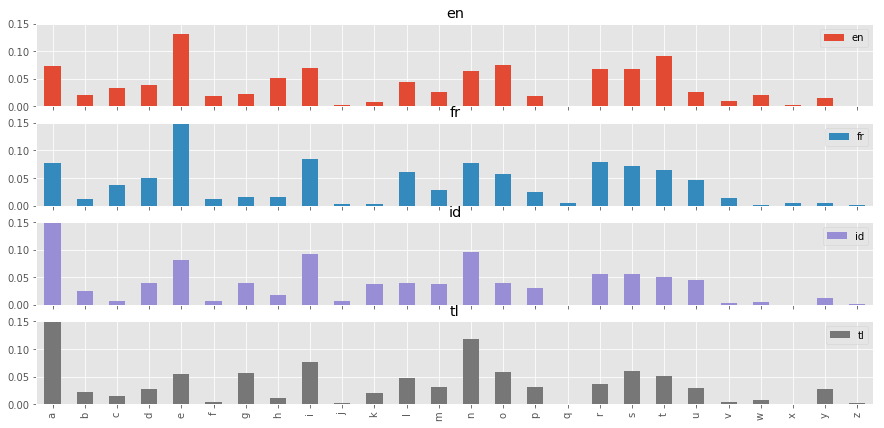

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import json

#알파벳 출현 빈도 데이터 읽어 들이기
with open("./lang/freq.json", "r", encoding="utf-8") as fp:
    freq = json.load(fp)

#언어마다 계산하기
lang_dic = {}

for i, lbl in enumerate(freq[0]["labels"]):
    fq = freq[0]["freqs"][i]
    if not (lbl in lang_dic):
        lang_dic[lbl] = fq
        continue
    for idx, v in enumerate(fq):
        lang_dic[lbl][idx] = (lang_dic[lbl][idx] + v) / 2

#Pandas의 DataFrame에 데이터 넣기
asclist = [chr(n) for n in range(97,97+26)]
df = pd.DataFrame(lang_dic, index=asclist)

#그래프 그리기
plt.style.use('ggplot')
df.plot(figsize=(15,7), kind="bar", subplots=True, ylim=(0,0.15))
plt.savefig("lang-plot.png")
plt.show()

In [82]:
#학습한 매개변수 저장
from sklearn import svm 
from sklearn.externals import joblib
import json

#각 언어의 출현 빈도 데이터(JSON) 읽어 들이기
with open("./lang/freq.json", "r", encoding="utf-8") as fp:
    d = json.load(fp)
    data = d[0]

#데이터 학습하기
clf = svm.SVC(gamma='auto')
clf.fit(data["freqs"], data["labels"])

#학습 데이터 저장하기
joblib.dump(clf, "./lang/freq.pkl")
print("ok")

ok


In [ ]:
import cgi, os.path
from sklearn.externals import joblib

#학습 데이터 읽어 들이기
pklfile = os.path.dirname(__file__) + "/freq.pkl"
clf = joblib.load(pklfile)

#텍스트 입력 양식 출력하기
def show_form(text, msg=""):
    print("Content-Type: text/html; charset=utf-8")
    print("")
    print("""
        <html><body><form>
        <textarea name="text" rows="8" cols="40">{0}</textarea>
        <p><input type="submit" value="판정"></p>
        <p>{1}</p>
        </form></body></html>
    """.format(cgi.escape(text), msg))

#판정하기
def detect_lang(text):
    #알파벳 출현 빈도 구하기
    text = text.lower() 
    code_a, code_z = (ord("a"), ord("z"))
    cnt = [0 for i in range(26)]
    
    for ch in text:
        n = ord(ch) - code_a
        if 0 <= n < 26: cnt[n] += 1
    total = sum(cnt)    
    if total == 0: return "입력이 없습니다"
    
    freq = list(map(lambda n: n/total, cnt))
    
    #언어 예측하기
    res = clf.predict([freq])
    
    #언어 코드를 한국어로 변환하기
    lang_dic = {"en":"영어","fr":"프랑스어",
        "id":"인도네시아어", "tl":"타갈로그어"}
    
#     return lang_dic[res[0]]
    return res

#입력 양식의 값 읽어 들이기
form = cgi.FieldStorage()
text = form.getvalue("text", default="")
msg = ""
if text != "":
    lang = detect_lang(text)
    msg = "Result:" + lang

#입력 양식 출력
show_form(text, msg)

In [ ]:
!python -m http.server --cgi 8080

## 4-5. 서포트 벡터 머신(SVM)

- 선을 구성하는 매개변수를 조정해서 요소들을 구분하는 선을 찾고, 이를 기반으로 패턴을 인식

- 마진 최대화 방법으로 선 탐색

**비만 여부 판단하기**

In [1]:
import random

#BMI를 계산해서 레이블을 리턴하는 함수
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: 
        return "thin"
    if bmi < 25: 
        return "normal"
    else: 
        return "fat"

#출력 파일 준비하기
fp = open("bmi.csv","w",encoding="utf-8")
fp.write("height,weight,label\r\n")

#무작위로 데이터 생성하기
cnt = {"thin":0, "normal":0, "fat":0}
for i in range(20000):
    h = random.randint(120,200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h, w, label))
fp.close()
print("ok,", cnt)

ok, {'thin': 6355, 'normal': 5978, 'fat': 7667}


In [3]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

#키와 몸무게 데이터 읽어 들이기
tbl = pd.read_csv("bmi.csv")

#칼럼(열)을 자르고 정규화하기
label = tbl["label"]
w = tbl["weight"] / 100 # 최대 100kg라고 가정
h = tbl["height"] / 200 # 최대 200cm라고 가정
wh = pd.concat([w, h], axis=1)

#학습 전용 데이터와 테스트 전용 데이터로 나누기
data_train, data_test, label_train, label_test = train_test_split(wh, label)

#데이터 학습하기
clf = svm.SVC(gamma='auto')
clf.fit(data_train, label_train)

#데이터 예측하기
predict = clf.predict(data_test)

#결과 테스트하기
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 0.9878
리포트 =
               precision    recall  f1-score   support

         fat       1.00      0.99      1.00      1984
      normal       0.96      1.00      0.98      1492
        thin       1.00      0.97      0.99      1524

   micro avg       0.99      0.99      0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



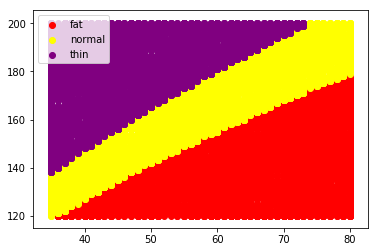

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

#Pandas로 CSV 파일 읽어 들이기
tbl = pd.read_csv("bmi.csv", index_col=2)

#그래프 그리기 시작
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#서브 플롯 전용 - 지정한 레이블을 임의의 색으로 칠하기
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"],b["height"], c=color, label=lbl)

scatter("fat",    "red")
scatter("normal", "yellow")
scatter("thin",   "purple")
ax.legend() 
plt.savefig("bmi-test.png")
plt.show()

## 4-6. 랜덤 포레스트 

* 학습 데이터를 기반으로 다수의 의사결정 트리를 만들고, 만들어진 의사결정 트리를 기반으로 다수결로 결과 유도

* 처리가 빠르고 분류 정밀도가 높음

**독버섯 구분하기**

In [6]:
import urllib.request as req
local= "mushroom.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, local)
print("ok")

ok


In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

#데이터 읽어 들이기
mr = pd.read_csv("mushroom.csv", header=None)

#데이터 내부의 기호를 숫자로 변환하기
label = []
data = []
attr_list = []

for row_index, row in mr.iterrows():
    label.append(row.loc[0])
    row_data = []
    for v in row.loc[1:]:
        row_data.append(ord(v))
    data.append(row_data)

#학습 전용과 테스트 전용 데이터로 나누기
data_train, data_test, label_train, label_test = train_test_split(data, label)

#데이터 학습시키기
clf = RandomForestClassifier()
clf.fit(data_train, label_train)

#데이터 예측하기
predict = clf.predict(data_test)

#결과 테스트하기 
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 1.0
리포트 =
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1057
           p       1.00      1.00      1.00       974

   micro avg       1.00      1.00      1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



C:\Users\LG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

#데이터 읽어 들이기
mr = pd.read_csv("mushroom.csv", header=None)

#데이터 내부의 분류 변수 전개하기
label = []
data = []
attr_list = []

for row_index, row in mr.iterrows():
    label.append(row.loc[0])
    exdata = []

    for col, v in enumerate(row.loc[1:]):
        if row_index == 0:
            attr = {"dic": {}, "cnt":0}
            attr_list.append(attr)
        else:
            attr = attr_list[col]
        
        #버섯의 특징 기호를 배열로 나타내기
        d = [0,0,0,0,0,0,0,0,0,0,0,0]
        if v in attr["dic"]:
            idx = attr["dic"][v]
        else:
            idx = attr["cnt"]
            attr["dic"][v] = idx
            attr["cnt"] += 1
        d[idx] = 1
        exdata += d
    data.append(exdata)

#학습 전용 데이터와 테스트 전용 데이터로 나누기
data_train, data_test, label_train, label_test = train_test_split(data, label)

#데이터 학습시키기
clf = RandomForestClassifier()
clf.fit(data_train, label_train)

#데이터 예측하기
predict = clf.predict(data_test)

#결과 테스트하기
ac_score = metrics.accuracy_score(label_test, predict)
print("정답률 =", ac_score)

정답률 = 1.0


C:\Users\LG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## 4-7. 데이터를 검증하는 방법

**Cross Validation**

* 특정 데이터를 훈련 전용 데이터와 테스트 전용 데이터로 분할한 뒤 훈련 데이터를 활용해 학습하고 테스트 데이터로 테스트해서 학습의 타당성을 검증하는 방법

In [13]:
from sklearn import svm, metrics
import random, re

#붓꽃의 CSV 파일 읽어 들이기
lines = open('iris.csv', 'r', encoding='utf-8').read().split("\n")

f_tonum = lambda n : float(n) if re.match(r'^[0-9\.]+$', n) else n
f_cols  = lambda li: list(map(f_tonum,li.strip().split(',')))
csv = list(map(f_cols, lines))
del csv[0] # 헤더 제거하기
random.shuffle(csv) # 데이터 섞기

#데이터를 K개로 분할하기
K = 5 
csvk = [ [] for i in range(K) ]
for i in range(len(csv)):
    csvk[i % K].append(csv[i])

#리스트를 훈련 전용 데이터와 테스트 전용 데이터로 분할하는 함수
def split_data_label(rows):
    data = []; label = []
    for row in rows:
        data.append(row[0:4])
        label.append(row[4])
    return (data, label)

#정답률 구하기
def calc_score(test, train):
    test_f, test_l = split_data_label(test)
    train_f, train_l = split_data_label(train)
    
    #학습시키고 정답률 구하기
    clf = svm.SVC(gamma='auto')
    clf.fit(train_f, train_l)
    pre = clf.predict(test_f)
    return metrics.accuracy_score(test_l, pre)

#K개로 분할해서 정답률 구하기
score_list = []
for testc in csvk:
    #testc 이외의 데이터를 훈련 전용 데이터로 사용하기
    trainc = []
    for i in csvk:
        if i != testc: trainc += i
    sc = calc_score(testc, trainc)
    score_list.append(sc)
print("각각의 정답률 =", score_list)
print("평균 정답률 =", sum(score_list) / len(score_list))

각각의 정답률 = [0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9]
평균 정답률 = 0.9600000000000002


In [15]:
import pandas as pd
from sklearn import svm, metrics, model_selection
import random, re

#붓꽃의 CSV 데이터 읽어 들이기
csv = pd.read_csv('iris.csv')

#리스트를 훈련 전용 데이터와 테스트 전용 데이터로 분할하기
data = csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
label = csv["Name"]

#크로스 밸리데이션하기 
clf = svm.SVC(gamma='auto')
scores = model_selection.cross_val_score(clf, data, label, cv=5)
print("각각의 정답률 =", scores)
print("평균 정답률 =", scores.mean())

각각의 정답률 = [0.96666667 1.         0.96666667 0.96666667 1.        ]
평균 정답률 = 0.9800000000000001


**Grid Search**

* 각 매개변수를 적당한 범위 내부에서 변경하면서 가장 성능이 좋을 때의 값을 찾는 방법

In [1]:
import pandas as pd
from sklearn import model_selection, svm, metrics
from sklearn.model_selection import GridSearchCV

#MNIST 학습 데이터 읽어 들이기
train_csv = pd.read_csv("./mnist/train.csv")
test_csv  = pd.read_csv("./mnist/t10k.csv")

#필요한 열 추출하기
train_label = train_csv.iloc[:, 0]
train_data  = train_csv.iloc[:, 1:577]
test_label  = test_csv.iloc[:, 0]
test_data   = test_csv.iloc[:, 1:577]
print("학습 데이터의 수 =", len(train_label))

#그리드 서치 매개변수 설정
params = [
    {"C": [1,10,100,1000], "kernel":["linear"]},
    {"C": [1,10,100,1000], "kernel":["rbf"], "gamma":[0.001, 0.0001]}
]

#그리드 서치 수행
clf = GridSearchCV( svm.SVC(gamma='auto'), params, n_jobs=-1 ) #n_jobs: 병렬 계산할 프로세스 수 지정 가능 / -1이면 자동으로 코어의 수에 맞게 프로세스 수 지정
clf.fit(train_data, train_label)
print("학습기 =", clf.best_estimator_)

#테스트 데이터 확인하기
pre = clf.predict(test_data)
ac_score = metrics.accuracy_score(pre, test_label)
print("정답률 =",ac_score)

학습 데이터의 수 = 1000


C:\Users\LG\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\LG\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


학습기 = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
정답률 = 0.866


# 5장 딥러닝

## 5-1. 딥러닝 개요 

**기존의 이미지 인식과 딥러닝을 이용한 이미지 인식의 차이**

-> 기존 방법에서는 사람이 이미지 내부에 있는 특징을 하나하나 지정했지만 딥러닝에서는 기계가 학습 데이터로부터 자동으로 특징을 추출

**신경망**

-> 신경망을 3개 이상 중첩한 DNN(Deep Neural Network)을 활용한 기계 학습을 딥러닝이라고 함

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

#a+b 연산
a = tf.constant(100)
b = tf.constant(50)
add_op = a + b

#변수 v 선언
v = tf.Variable(0)

#변수 v에 add_op 결과 대입하기
let_op = tf.assign(v, add_op)

#세션 시작
sess = tf.Session()

#변수 초기화
sess.run(tf.global_variables_initializer())

#let_op 실행하기
sess.run(let_op)

#출력하기
print(sess.run(v))

150


# 6장. 텍스트 분석과 챗봇 만들기

## 6.6 마르코프 체인과 LSTM으로 문장 생성하기

마르코프 성질: 과거의 상태를 무시하고 현재의 상태만을 기반으로 다음 상태를 선택하는 것을 의미

[1] 문장을 단어로 분할(형태소 분석)합니다.

[2] 단어의 전후 연결을 딕셔너리에 등록합니다.

[3] 사전을 사용해 임의의 문장을 생성합니다.